### Global Power Plant Database

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,GridSearchCV,train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [319]:
GPD=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv")
GPD

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 908 rows and 25 columns

In [320]:
GPD.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [321]:
GPD.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
GPD.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 Categorical columns and 13 Numerical columns.

In [323]:
GPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [324]:
GPD.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are many missing values in most of the columns

In [325]:
GPD.duplicated().sum()

0

There are no duplicate values in this dataset

Dropping empty columns

In [326]:
GPD.drop(columns=["other_fuel2","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [327]:
GPD.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

Columns "country","country_long","year_of_capacity_data" and "generation_data_source" have only one unique value.Hence we can drop these columns 

In [328]:
GPD["country"].value_counts()

country
IND    908
Name: count, dtype: int64

We see only IND is listed in the country column and hence no impact of this feature on prediction

In [329]:
GPD["country_long"].value_counts()

country_long
India    908
Name: count, dtype: int64

We see only "India" country_long is listed in the country column and hence no impact of this feature on prediction

In [330]:
GPD["year_of_capacity_data"].value_counts()

year_of_capacity_data
2018.0    520
Name: count, dtype: int64

year of capacity data has only 2018 listed value and hence there is no impact on predicting the target 

In [331]:
GPD["generation_data_source"].value_counts()

generation_data_source
Central Electricity Authority    450
Name: count, dtype: int64

generation_data_source has only Central Electricity Authority as listed value , it has 458 null values and  there is no impact on predicting the target 

In [332]:
GPD.drop(columns=["country","country_long","year_of_capacity_data","generation_data_source"],axis=1,inplace=True)

In [333]:
GPD

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [334]:
GPD.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [335]:
GPD["name"].value_counts()

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: count, Length: 908, dtype: int64

In [336]:
GPD["gppd_idnr"].value_counts()

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64

In [337]:
GPD["owner"].value_counts()

owner
Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: count, Length: 280, dtype: int64

In [338]:
GPD["url"].value_counts()

url
http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: count, Length: 304, dt

Columns"name","gppd_idnr", "owner", "url" are all unique values and it does not impact the target variable

In [339]:

GPD.drop(columns=["name","gppd_idnr","owner","url"],axis=1,inplace=True)

In [340]:
GPD

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [341]:
GPD.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

<Axes: >

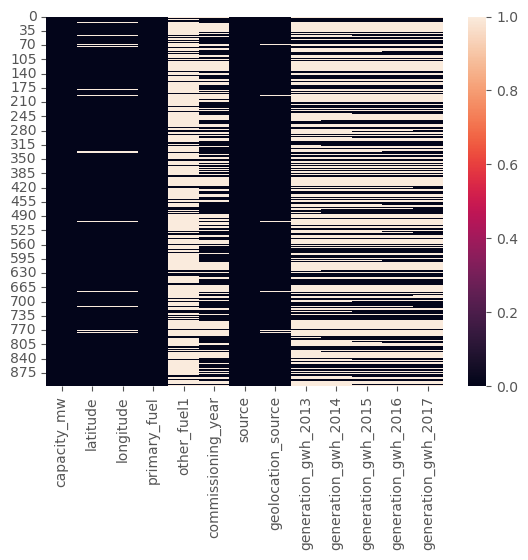

In [342]:
sns.heatmap(GPD.isnull())

White lines in the heat map indicates the missing values in the dataset

##### Filling Null values

In [343]:
GPD.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [344]:
GPD['latitude'].mean()

21.196188863109047

In [345]:
GPD['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

In [346]:
GPD["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

In [347]:
GPD["latitude"] = GPD["latitude"].fillna(GPD["latitude"].mean())
GPD["other_fuel1"] = GPD["other_fuel1"].fillna(GPD["other_fuel1"].mode()[0])
GPD["geolocation_source"] = GPD["geolocation_source"].fillna(GPD["geolocation_source"].mode()[0])
GPD["longitude"] = GPD["longitude"].fillna(GPD["longitude"].median())
GPD["commissioning_year"] = GPD["commissioning_year"].fillna(GPD["commissioning_year"].median())
GPD["generation_gwh_2013"] = GPD["generation_gwh_2013"].fillna(GPD["generation_gwh_2013"].median())
GPD["generation_gwh_2014"] = GPD["generation_gwh_2014"].fillna(GPD["generation_gwh_2014"].median())
GPD["generation_gwh_2015"] = GPD["generation_gwh_2015"].fillna(GPD["generation_gwh_2015"].median())
GPD["generation_gwh_2016"] = GPD["generation_gwh_2016"].fillna(GPD["generation_gwh_2016"].median())
GPD["generation_gwh_2017"] = GPD["generation_gwh_2017"].fillna(GPD["generation_gwh_2017"].median())

In [348]:
GPD.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<Axes: >

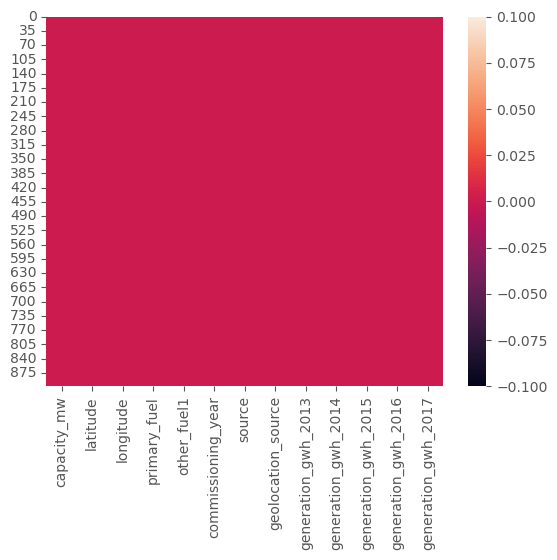

In [349]:
sns.heatmap(GPD.isnull())

Now there are no missing values

In [350]:
GPD.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [351]:
GPD['commissioning_year'].value_counts()

commissioning_year
2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1946.0      1
1956.0      1
1937.0      1
1959.0      1
1953.0      1
Name: count, Length: 73, dtype: int64

In [352]:
#Calculated Powerplant Age by subtracting commissioning year from year 2017
GPD["PowerPlant_age"]=2017-GPD["commissioning_year"]


In [353]:
GPD.drop(columns=["commissioning_year"],inplace=True)

In [354]:
GPD

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PowerPlant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,6.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,13.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,1.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,17.0


Statistical Analysis for Numerical data

In [355]:
GPD.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PowerPlant_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,18.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,14.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,17.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,20.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,90.000000


Observations:
1.As there is a huge difference between 75% amd max value, outliers are present in the dataset
2.Right Skewness present in the columns capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 as mean is greater than median 


In [356]:
categorical_col=[]
for i in GPD.dtypes.index:
    if GPD.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [357]:
numerical_col=[]
for i in GPD.dtypes.index:
    if GPD.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'PowerPlant_age']


### Exploratory Data Analysis(EDA)

### Univariate Analysis

In [358]:
GPD['primary_fuel'].value_counts()


primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

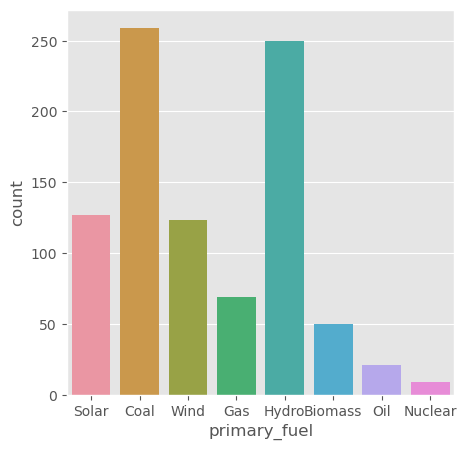

In [359]:
plt.figure(figsize=(5,5))
sns.countplot(x='primary_fuel',data=GPD)
plt.show()

Coal has the highest count and then Hydrofuel has the second highest count

In [360]:
GPD['other_fuel1'].value_counts()

other_fuel1
Oil             905
Gas               2
Cogeneration      1
Name: count, dtype: int64

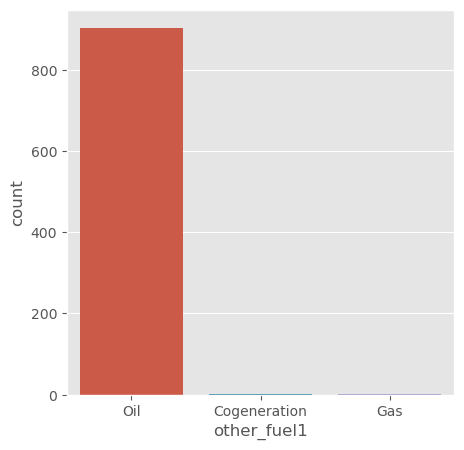

In [361]:
plt.figure(figsize=(5,5))
sns.countplot(x='other_fuel1',data=GPD)
plt.show()

Oil has the maximum fuel type

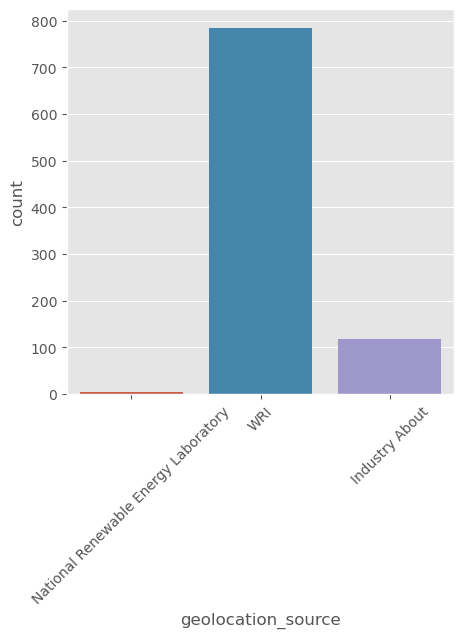

In [362]:
plt.figure(figsize=(5,5))
sns.countplot(x='geolocation_source',data=GPD)
plt.xticks(rotation=45)
plt.show()

In [363]:
GPD['geolocation_source'].value_counts()

geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

WRI hs the highest count.

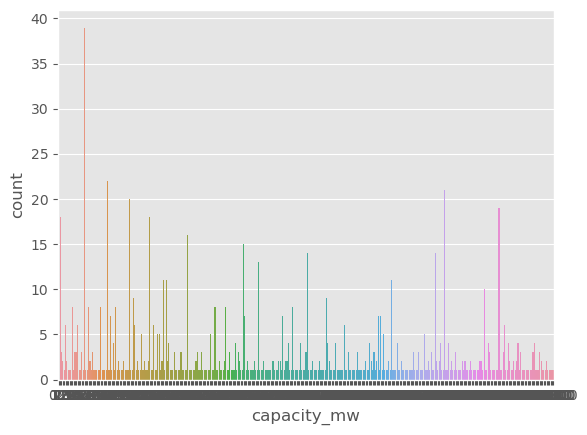

In [364]:
sns.countplot(x='capacity_mw',data=GPD)
plt.show()

In [365]:
GPD['capacity_mw'].value_counts()

capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64

Distribution of plot

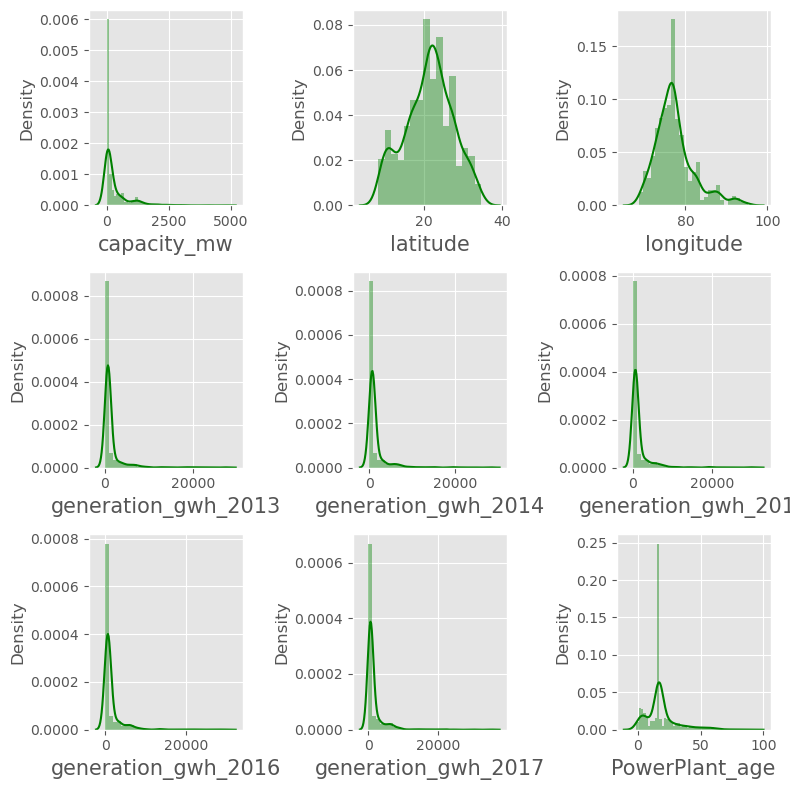

In [366]:
plt.figure(figsize=(8,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(GPD[column],color="g")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### BiVariate Analysis

##### Features Vs target Capacity

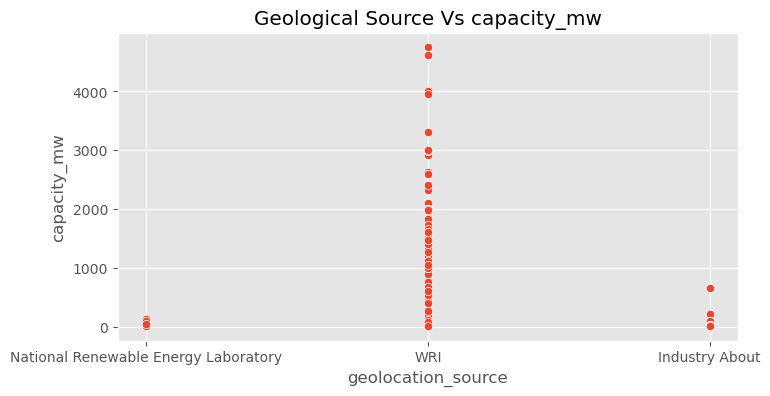

In [367]:
plt.figure(figsize=[8,4])
plt.title('Geological Source Vs capacity_mw')
sns.scatterplot(x='geolocation_source',y='capacity_mw',data=GPD)
plt.show()

WRI contributes highy towards capacity

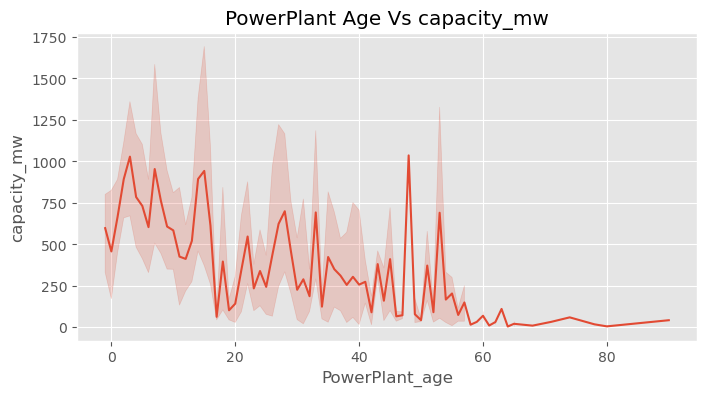

In [368]:
plt.figure(figsize=[8,4])
plt.title('PowerPlant Age Vs capacity_mw')
sns.lineplot(x='PowerPlant_age',y='capacity_mw',data=GPD)
plt.show()

Capacity is less when powerplant age is more and when the powerplant age is less, the capacity is more

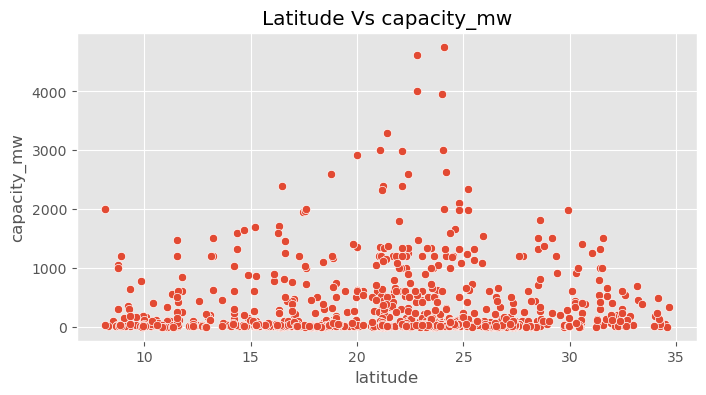

In [369]:
plt.figure(figsize=[8,4])
plt.title('Latitude Vs capacity_mw')
sns.scatterplot(x='latitude',y='capacity_mw',data=GPD)
plt.show()

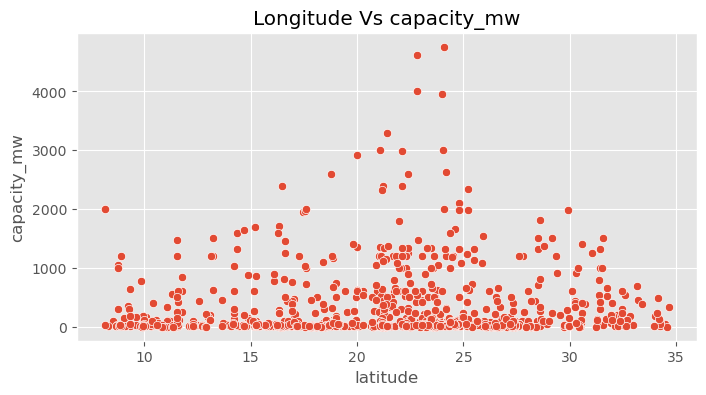

In [370]:
plt.figure(figsize=[8,4])
plt.title('Longitude Vs capacity_mw')
sns.scatterplot(x='latitude',y='capacity_mw',data=GPD)
plt.show()

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

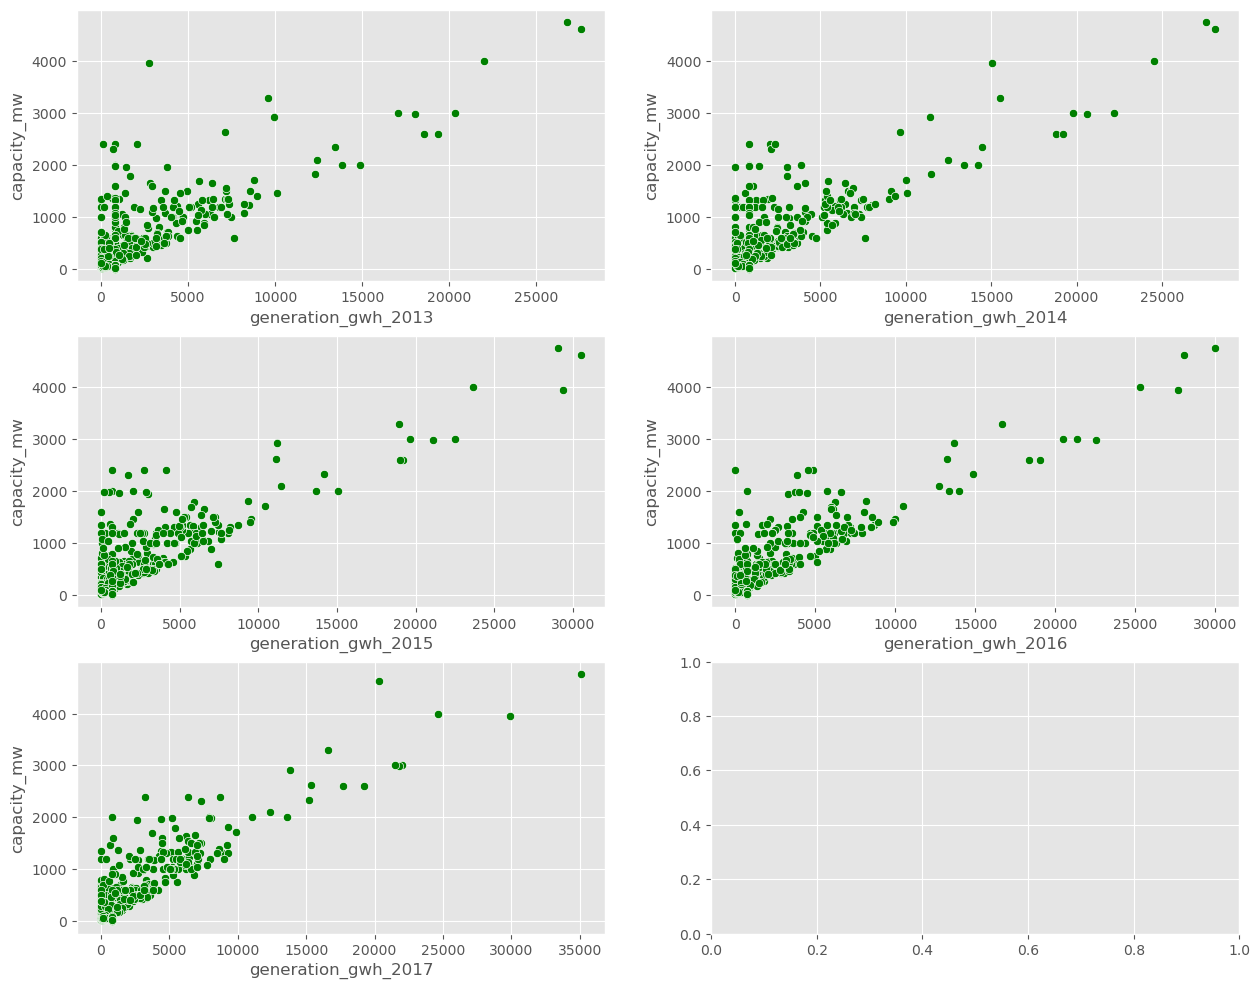

In [371]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

sns.scatterplot(x="generation_gwh_2013",y = "capacity_mw",ax=axes[0,0],data =GPD,color="g")
sns.scatterplot(x="generation_gwh_2014",y = "capacity_mw",ax=axes[0,1],data =GPD,color="g")
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=GPD,color="g")
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=GPD,color="g")
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=GPD,color="g")

As the generation growth increases the capacity also increases.

#### Features Vs target Fuel

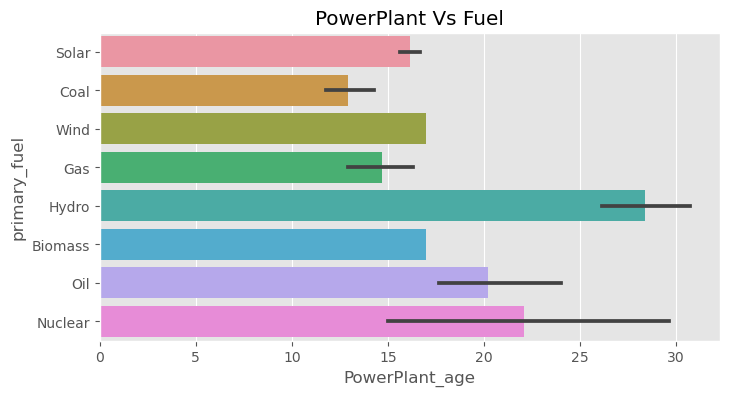

In [374]:
plt.figure(figsize=[8,4])
plt.title('PowerPlant Vs Fuel')
sns.barplot(x='PowerPlant_age',y='primary_fuel',data=GPD)
plt.show()

Older power plants uses hydro as a energy source,oil. New poerplant uses Coal,Solar and Gas.

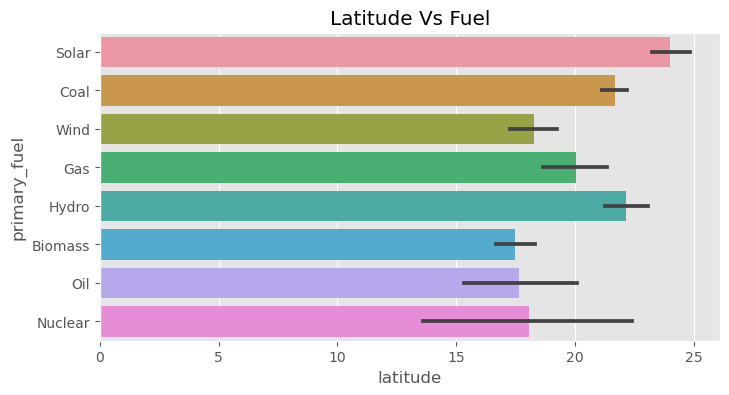

In [375]:
plt.figure(figsize=[8,4])
plt.title('Latitude Vs Fuel')
sns.barplot(x='latitude',y='primary_fuel',data=GPD)
plt.show()

Solar has the highest latitude

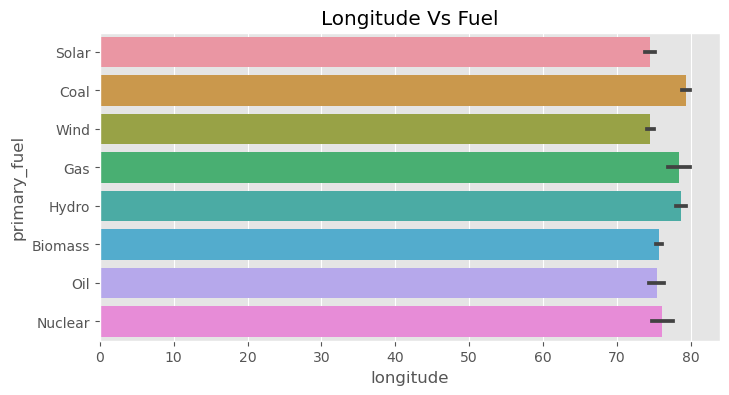

In [376]:
plt.figure(figsize=[8,4])
plt.title('Longitude Vs Fuel')
sns.barplot(x='longitude',y='primary_fuel',data=GPD)
plt.show()

<Axes: xlabel='generation_gwh_2017', ylabel='primary_fuel'>

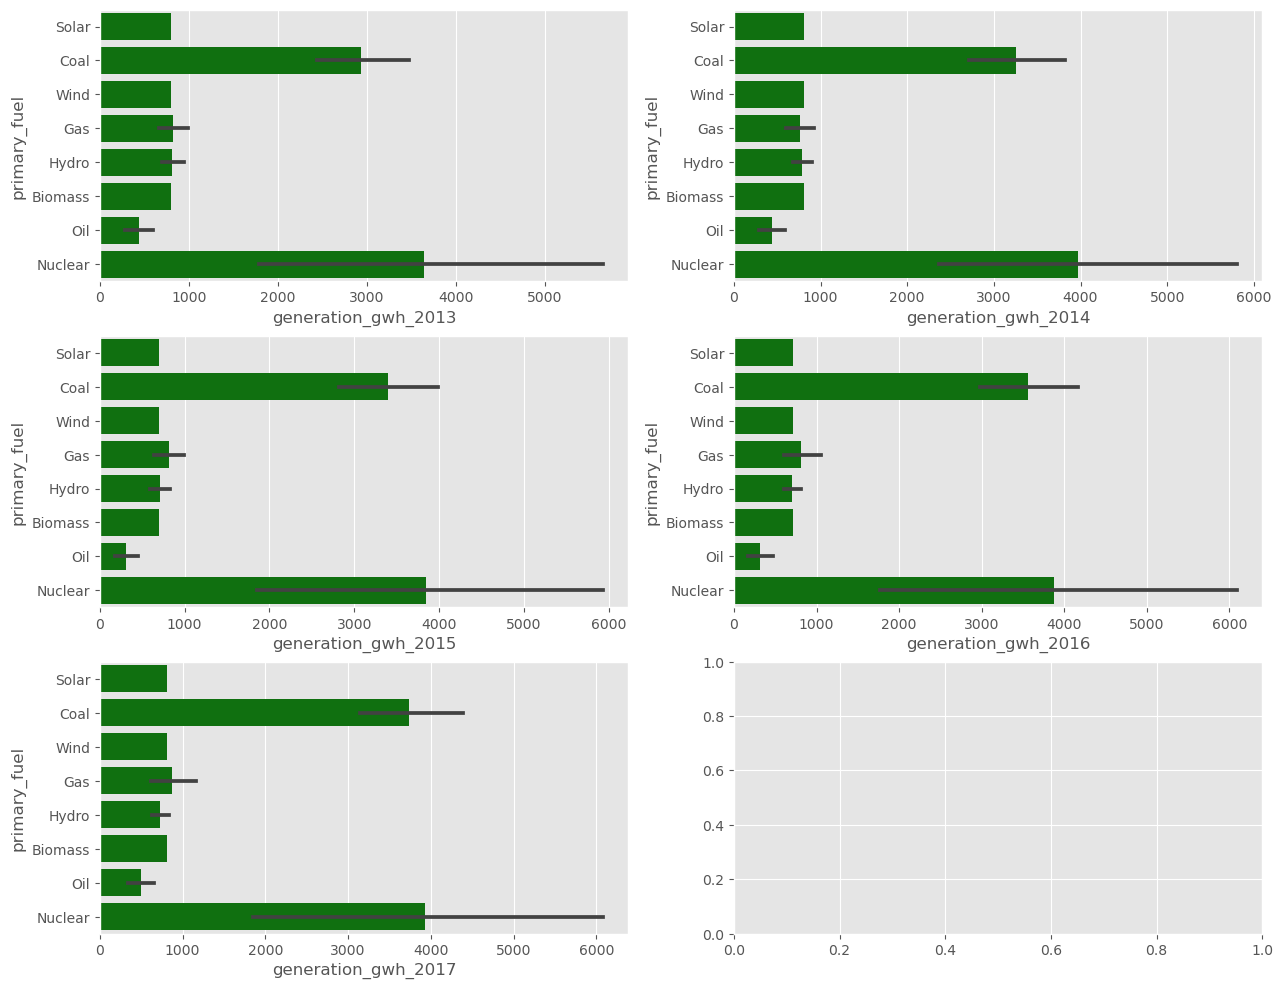

In [377]:
fig,axes=plt.subplots(3,2,figsize=(15,12))
sns.barplot(x="generation_gwh_2013",y = "primary_fuel",ax=axes[0,0],data =GPD,color="g")
sns.barplot(x="generation_gwh_2014",y = "primary_fuel",ax=axes[0,1],data =GPD,color="g")
sns.barplot(x='generation_gwh_2015',y='primary_fuel',ax=axes[1,0],data=GPD,color="g")
sns.barplot(x='generation_gwh_2016',y='primary_fuel',ax=axes[1,1],data=GPD,color="g")
sns.barplot(x='generation_gwh_2017',y='primary_fuel',ax=axes[2,0],data=GPD,color="g")

Most of the energy used is nuclear and then coal 

#### Converting Categorical column into Numerical Column

In [378]:
Le=LabelEncoder()
GPD[categorical_col]=GPD[categorical_col].apply(Le.fit_transform)

In [379]:
GPD

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PowerPlant_age
0,2.5,28.1839,73.2407,6,2,109,1,797.063475,805.760000,701.027250,716.728350,807.601700,6.0
1,98.0,24.7663,74.6090,1,2,174,2,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
2,39.2,21.9038,69.3732,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
3,135.0,23.8712,91.3602,2,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,13.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,22,2,797.063475,805.760000,0.994875,233.596650,865.400000,1.0
904,3.0,12.8932,78.1654,6,2,77,0,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
905,25.5,15.2758,75.5811,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,17.0
906,80.0,24.3500,73.7477,1,2,59,2,797.063475,805.760000,701.027250,716.728350,807.601700,17.0


##### Plotting Outliers


capacity_mw               Axes(0.125,0.747241;0.227941x0.132759)
latitude               Axes(0.398529,0.747241;0.227941x0.132759)
longitude              Axes(0.672059,0.747241;0.227941x0.132759)
primary_fuel              Axes(0.125,0.587931;0.227941x0.132759)
other_fuel1            Axes(0.398529,0.587931;0.227941x0.132759)
source                 Axes(0.672059,0.587931;0.227941x0.132759)
geolocation_source        Axes(0.125,0.428621;0.227941x0.132759)
generation_gwh_2013    Axes(0.398529,0.428621;0.227941x0.132759)
generation_gwh_2014    Axes(0.672059,0.428621;0.227941x0.132759)
generation_gwh_2015        Axes(0.125,0.26931;0.227941x0.132759)
generation_gwh_2016     Axes(0.398529,0.26931;0.227941x0.132759)
generation_gwh_2017     Axes(0.672059,0.26931;0.227941x0.132759)
PowerPlant_age                Axes(0.125,0.11;0.227941x0.132759)
dtype: object

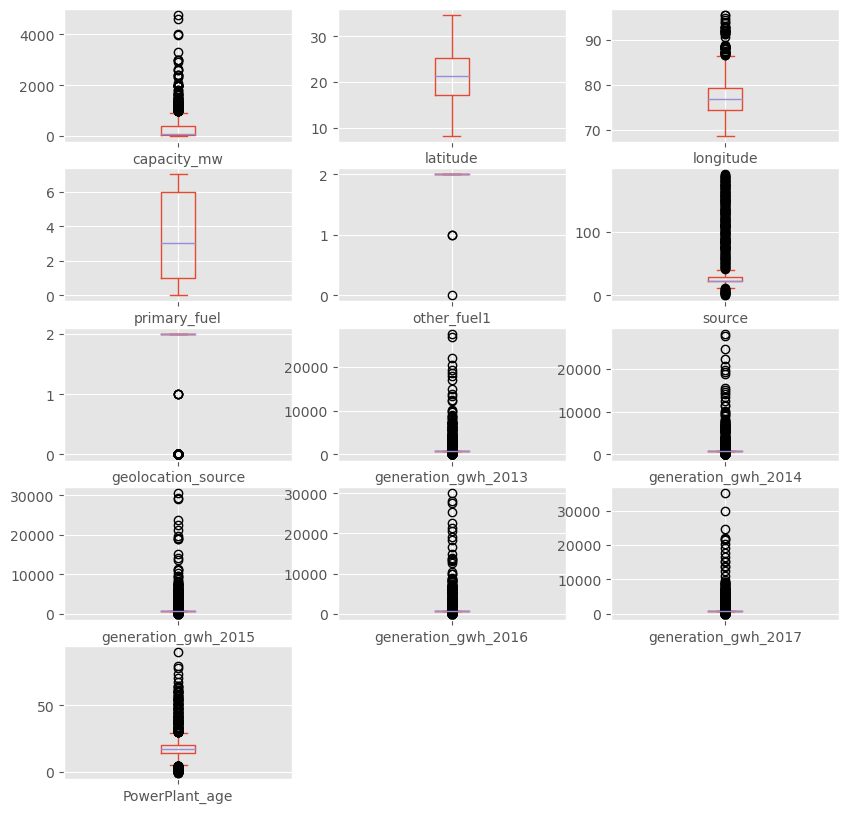

In [380]:
GPD.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10))

Outliers are present in all the columns except latitude and primary fuel

#### Removing Outliers

In [381]:
feat_outliers = GPD[['longitude', 'generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'PowerPlant_age']]

Removing the columns which has outliers

In [382]:
z = np.abs(zscore(feat_outliers))
threshold = 3
GPD_new = GPD[(z<3).all(axis = 1)]
GPD_new.shape

(852, 13)

In [383]:
GPDcorr=GPD_new.corr()
GPDcorr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PowerPlant_age
capacity_mw,1.000000,0.047883,0.269970,-0.398618,-0.002132,-0.277952,0.236602,0.575972,0.627406,0.685477,0.761222,0.800618,-0.248690
latitude,0.047883,1.000000,-0.025155,-0.006130,0.036941,0.068515,-0.201910,0.074709,0.082205,0.071786,0.057760,0.070934,-0.084720
longitude,0.269970,-0.025155,1.000000,-0.388568,0.029138,-0.234616,0.264391,0.122737,0.126913,0.163771,0.207339,0.209047,-0.107977
primary_fuel,-0.398618,-0.006130,-0.388568,1.000000,0.006390,0.039078,-0.478338,-0.232343,-0.250540,-0.277754,-0.290226,-0.291655,0.087476
other_fuel1,-0.002132,0.036941,0.029138,0.006390,1.000000,0.028433,-0.022798,0.001675,-0.000346,0.005892,0.015135,0.011855,-0.055179
source,-0.277952,0.068515,-0.234616,0.039078,0.028433,1.000000,-0.498012,-0.135116,-0.141641,-0.157690,-0.161786,-0.158162,-0.056455
geolocation_source,0.236602,-0.201910,0.264391,-0.478338,-0.022798,-0.498012,1.000000,0.108337,0.113568,0.126437,0.129721,0.126815,0.035803
generation_gwh_2013,0.575972,0.074709,0.122737,-0.232343,0.001675,-0.135116,0.108337,1.000000,0.944730,0.845955,0.730317,0.660801,-0.012797
generation_gwh_2014,0.627406,0.082205,0.126913,-0.250540,-0.000346,-0.141641,0.113568,0.944730,1.000000,0.911892,0.800808,0.742744,-0.069265
generation_gwh_2015,0.685477,0.071786,0.163771,-0.277754,0.005892,-0.157690,0.126437,0.845955,0.911892,1.000000,0.907462,0.826148,-0.141499


<Axes: >

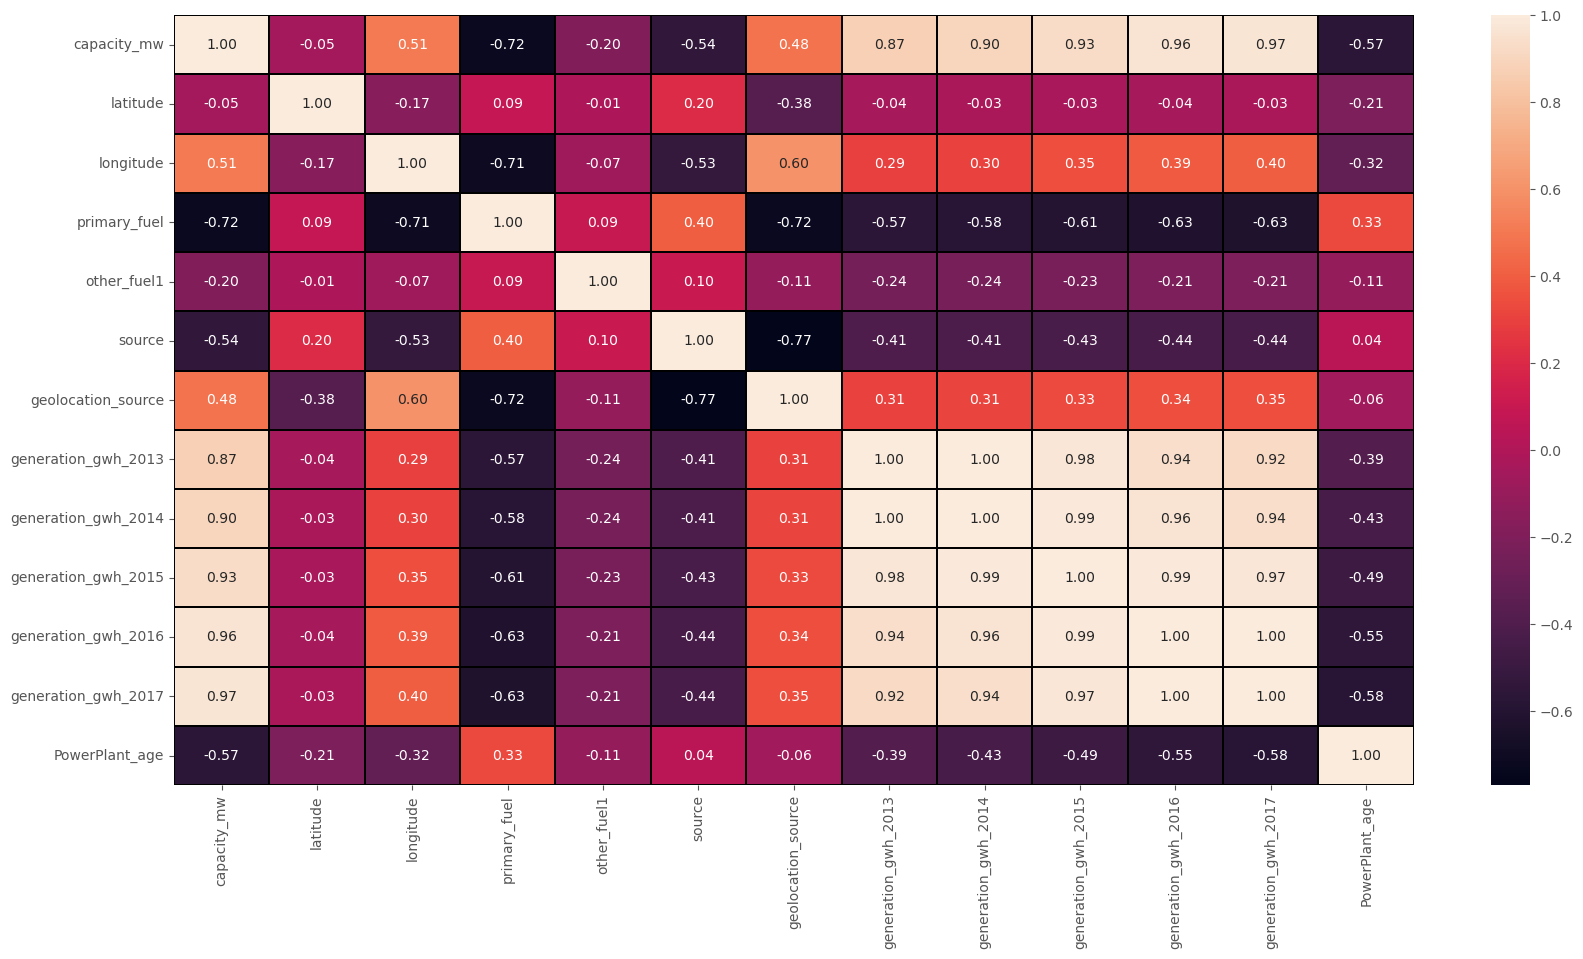

In [384]:
plt.figure(figsize=(20,10))
sns.heatmap(GPDcorr.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

Capacity is highly correlated with generation growth and viceversa.
Primary fuel is less correlated with other fuel1 and latitude. 

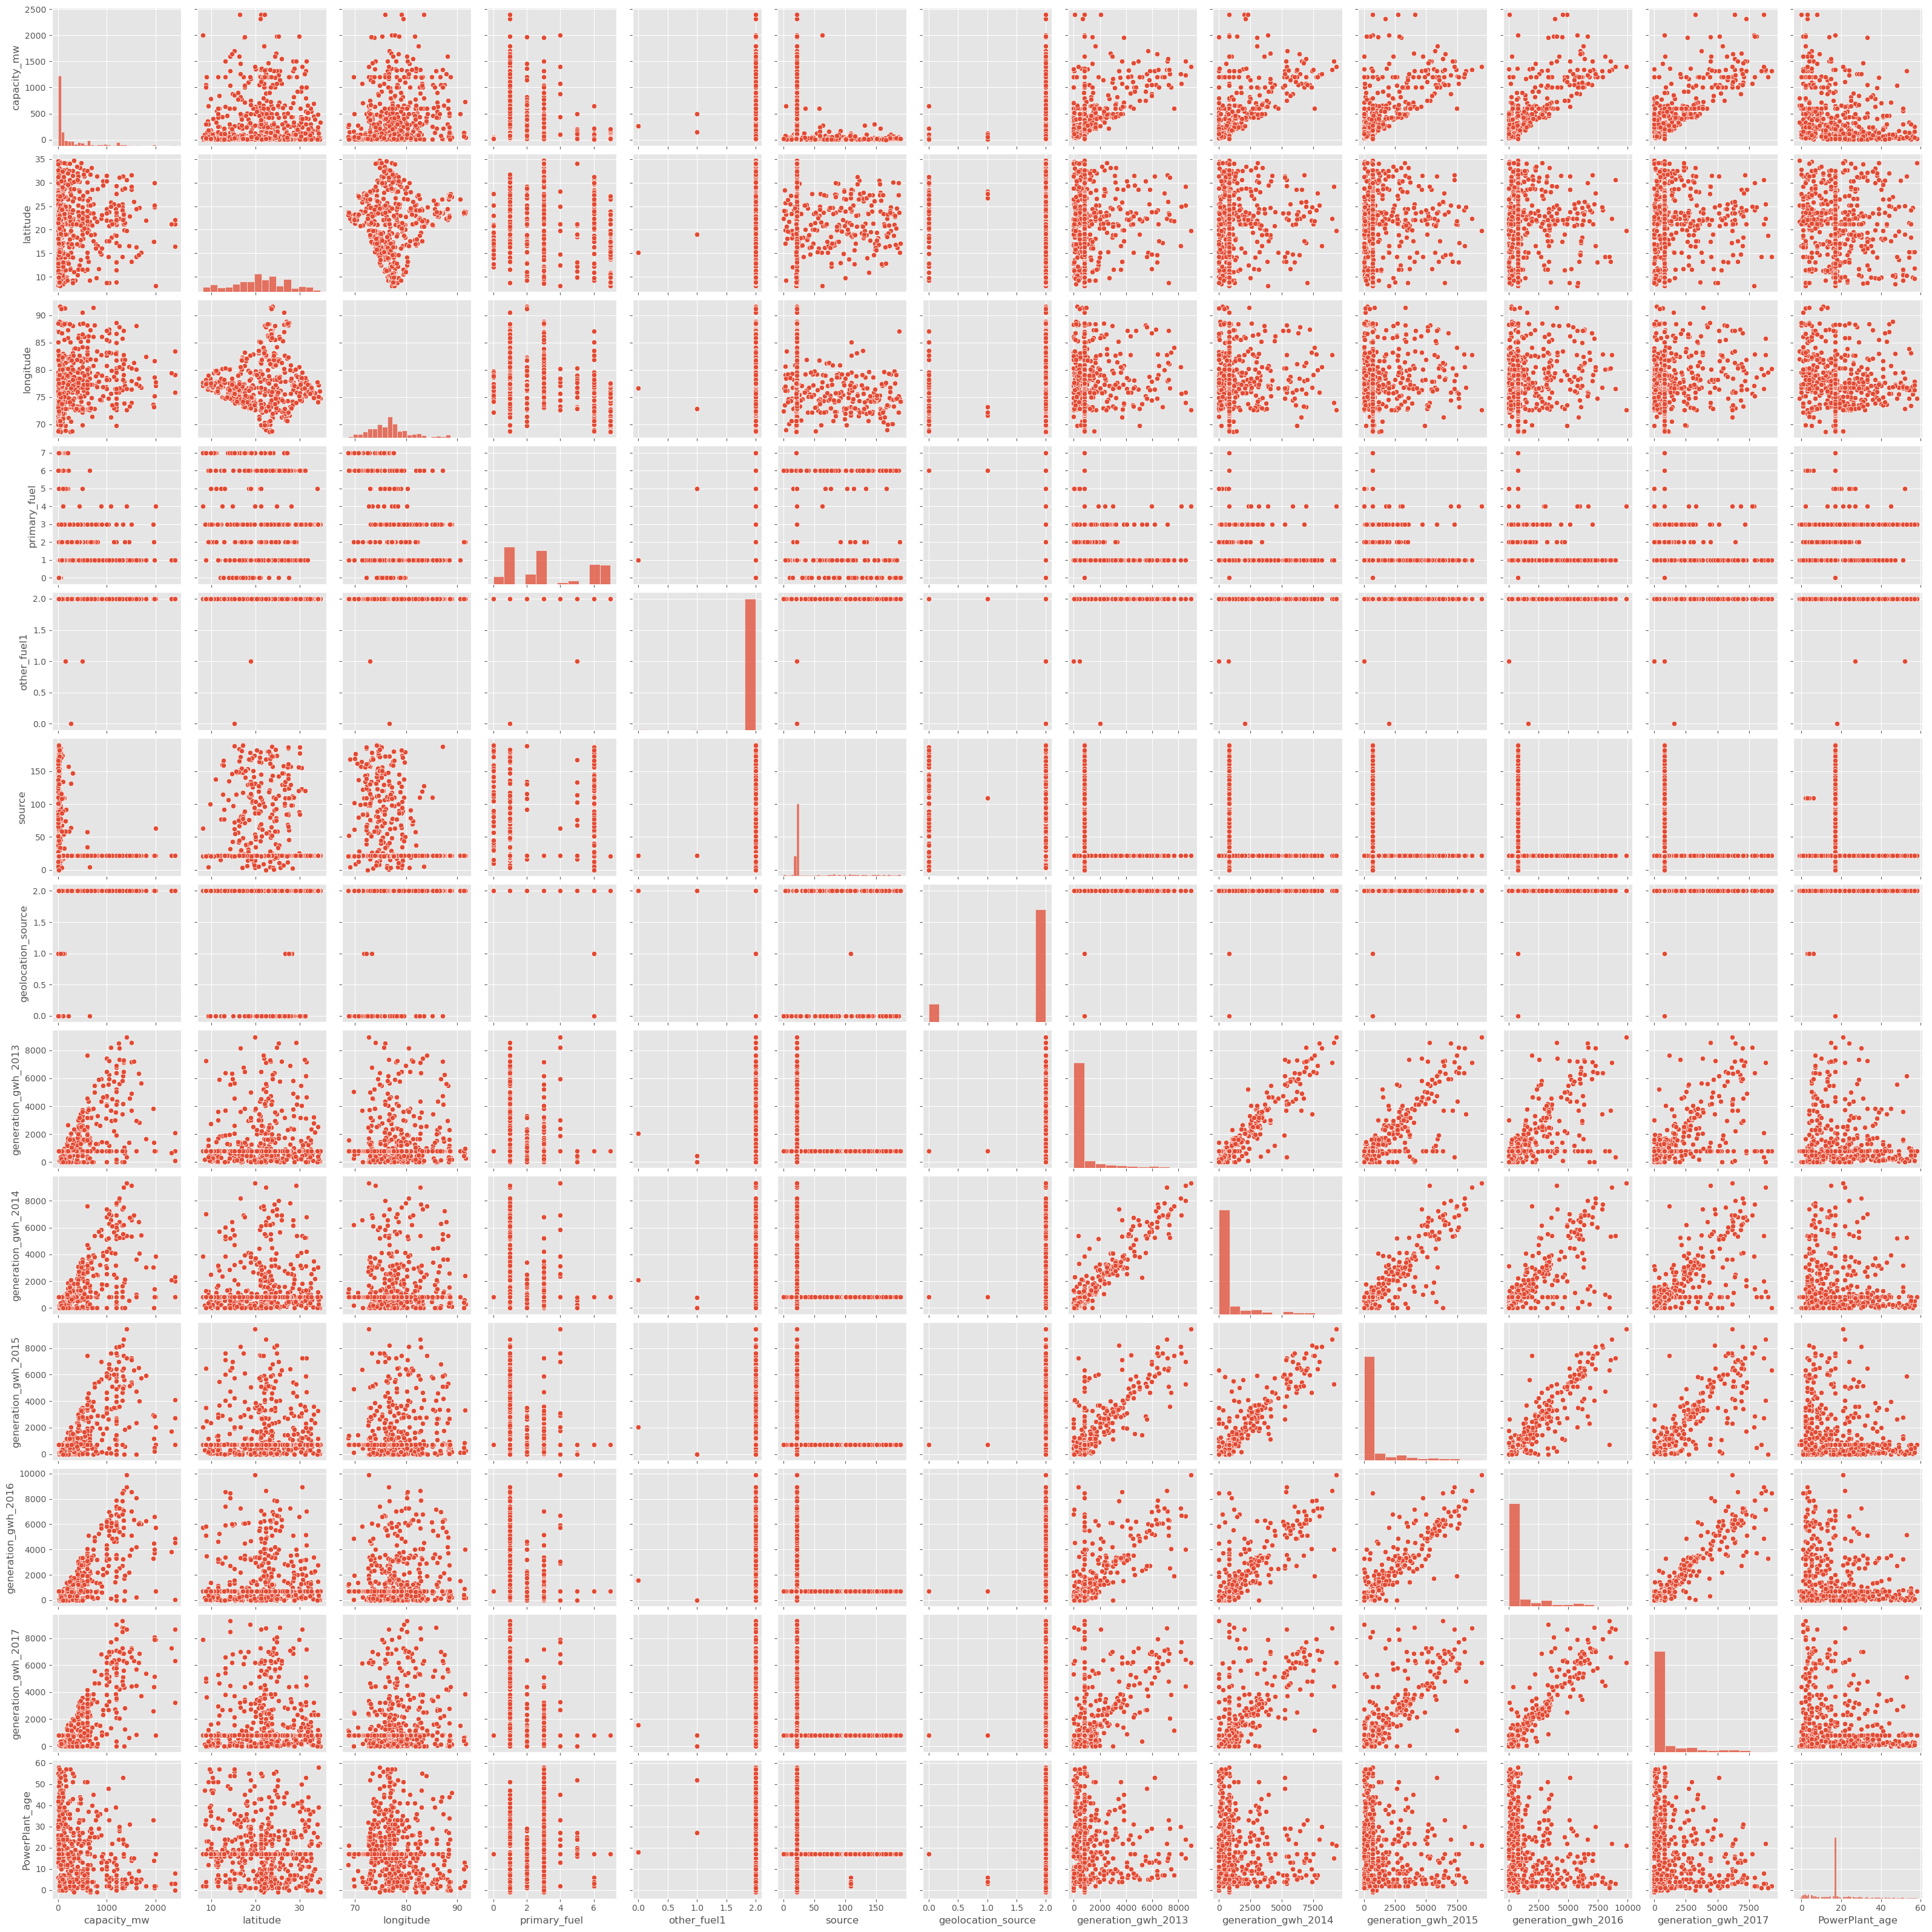

In [385]:
sns.pairplot(GPD_new)
plt.show()

As latitude and other fuel1 is less coorelated with primary fuel, droping the columns. 

In [387]:

GPD_new.drop("other_fuel1",axis=1,inplace=True)
GPD_new.drop("latitude",axis=1,inplace=True)

Skewness


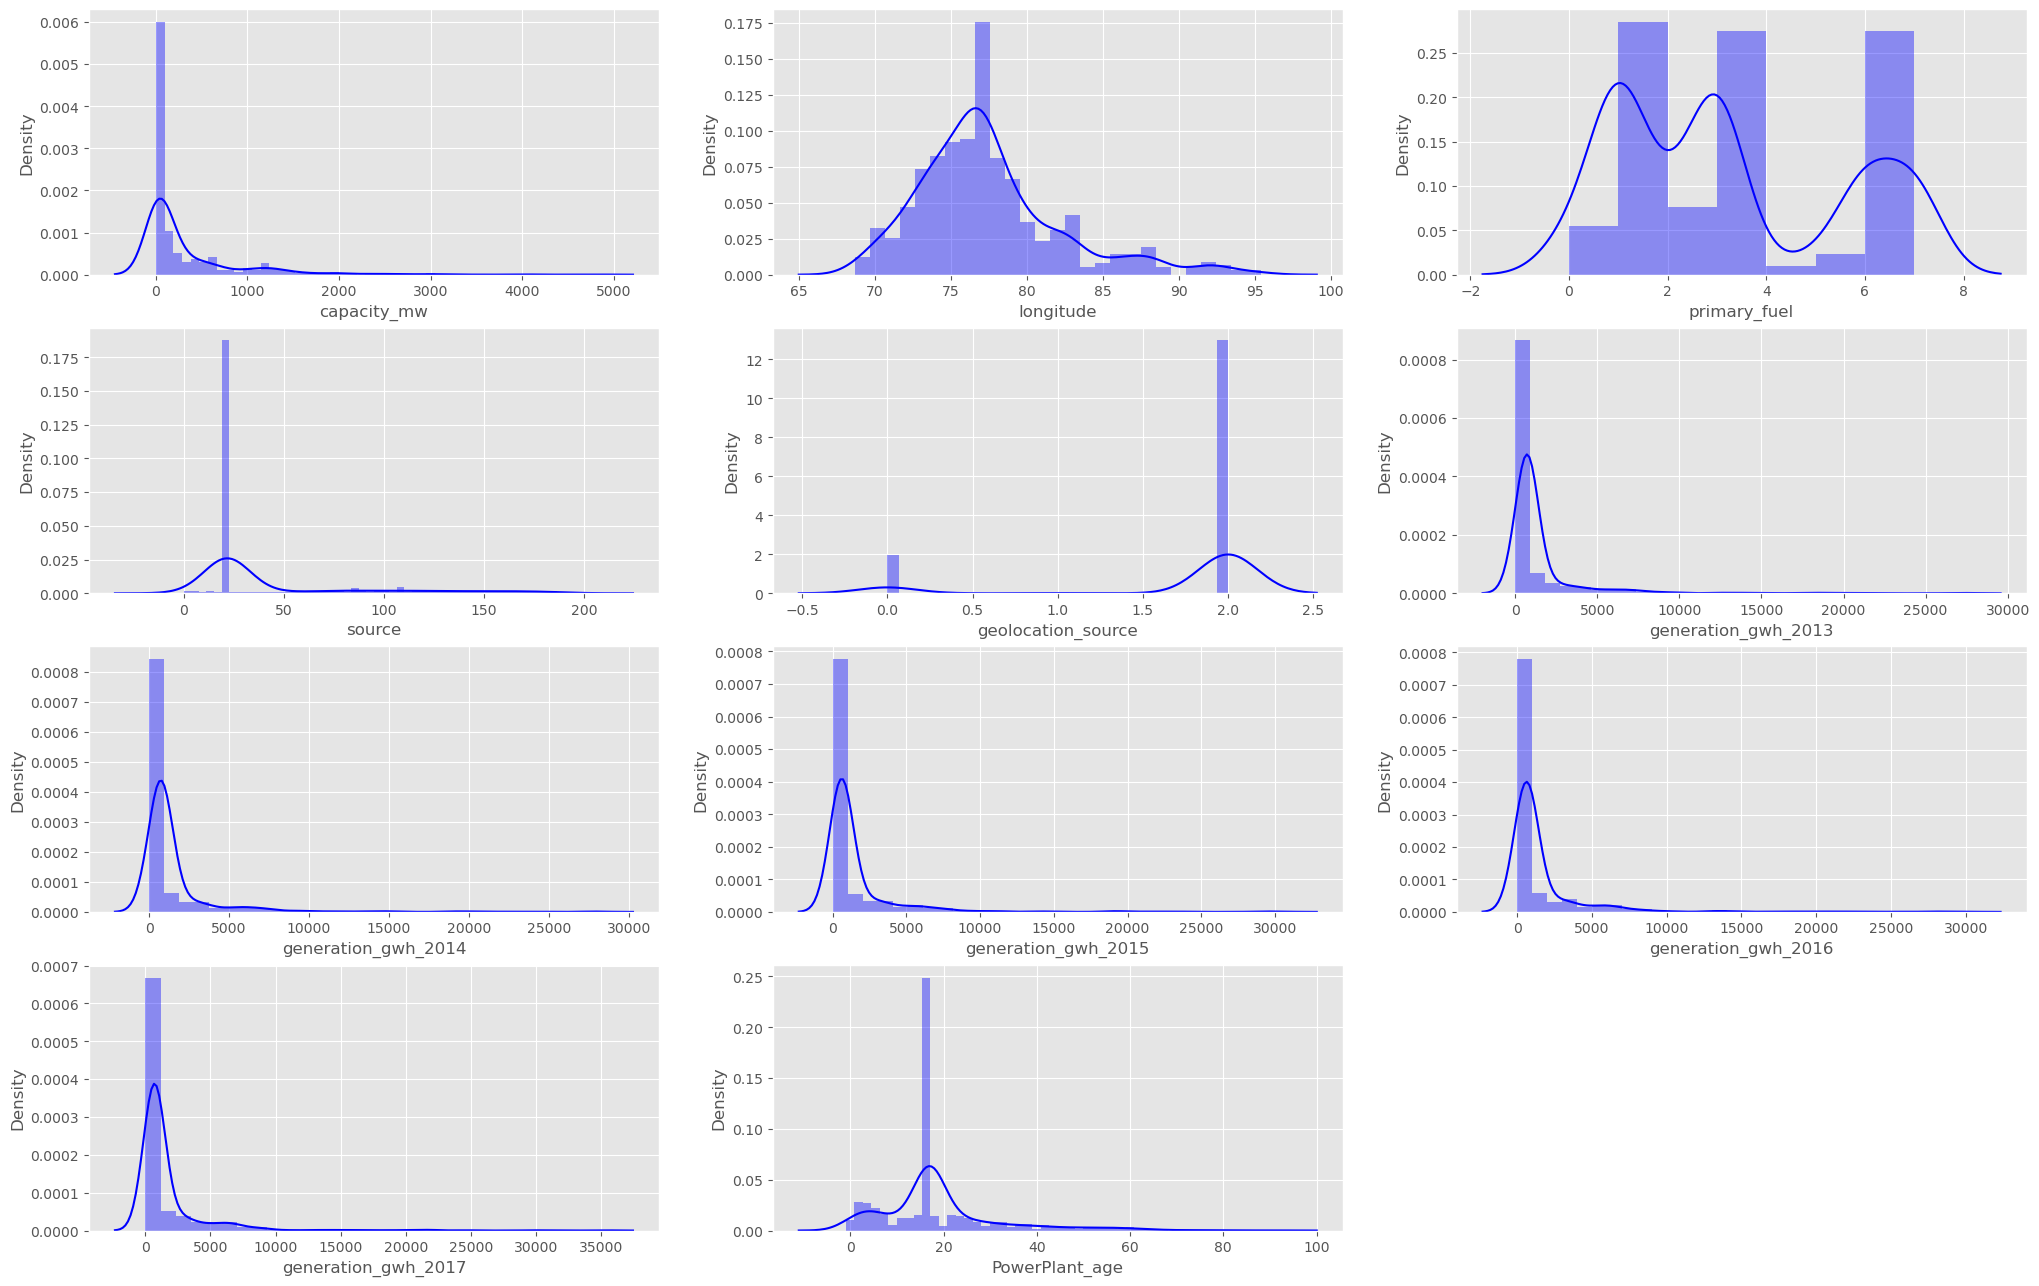

In [388]:
plt.figure(figsize=(25,20))
for i in enumerate(GPD_new.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(GPD[i[1]],color='b')

In [389]:
GPD_new.skew()

capacity_mw            2.134177
longitude              0.888694
primary_fuel           0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
PowerPlant_age         1.209638
dtype: float64

Most of the columns are skewed. We need to remove the skewed data >0.5

In [390]:
from sklearn.preprocessing import power_transform

GPD_new[['capacity_mw','longitude','source','geolocation_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','PowerPlant_age']]=power_transform(GPD_new[['capacity_mw','longitude','source','geolocation_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','PowerPlant_age']],method='yeo-johnson')

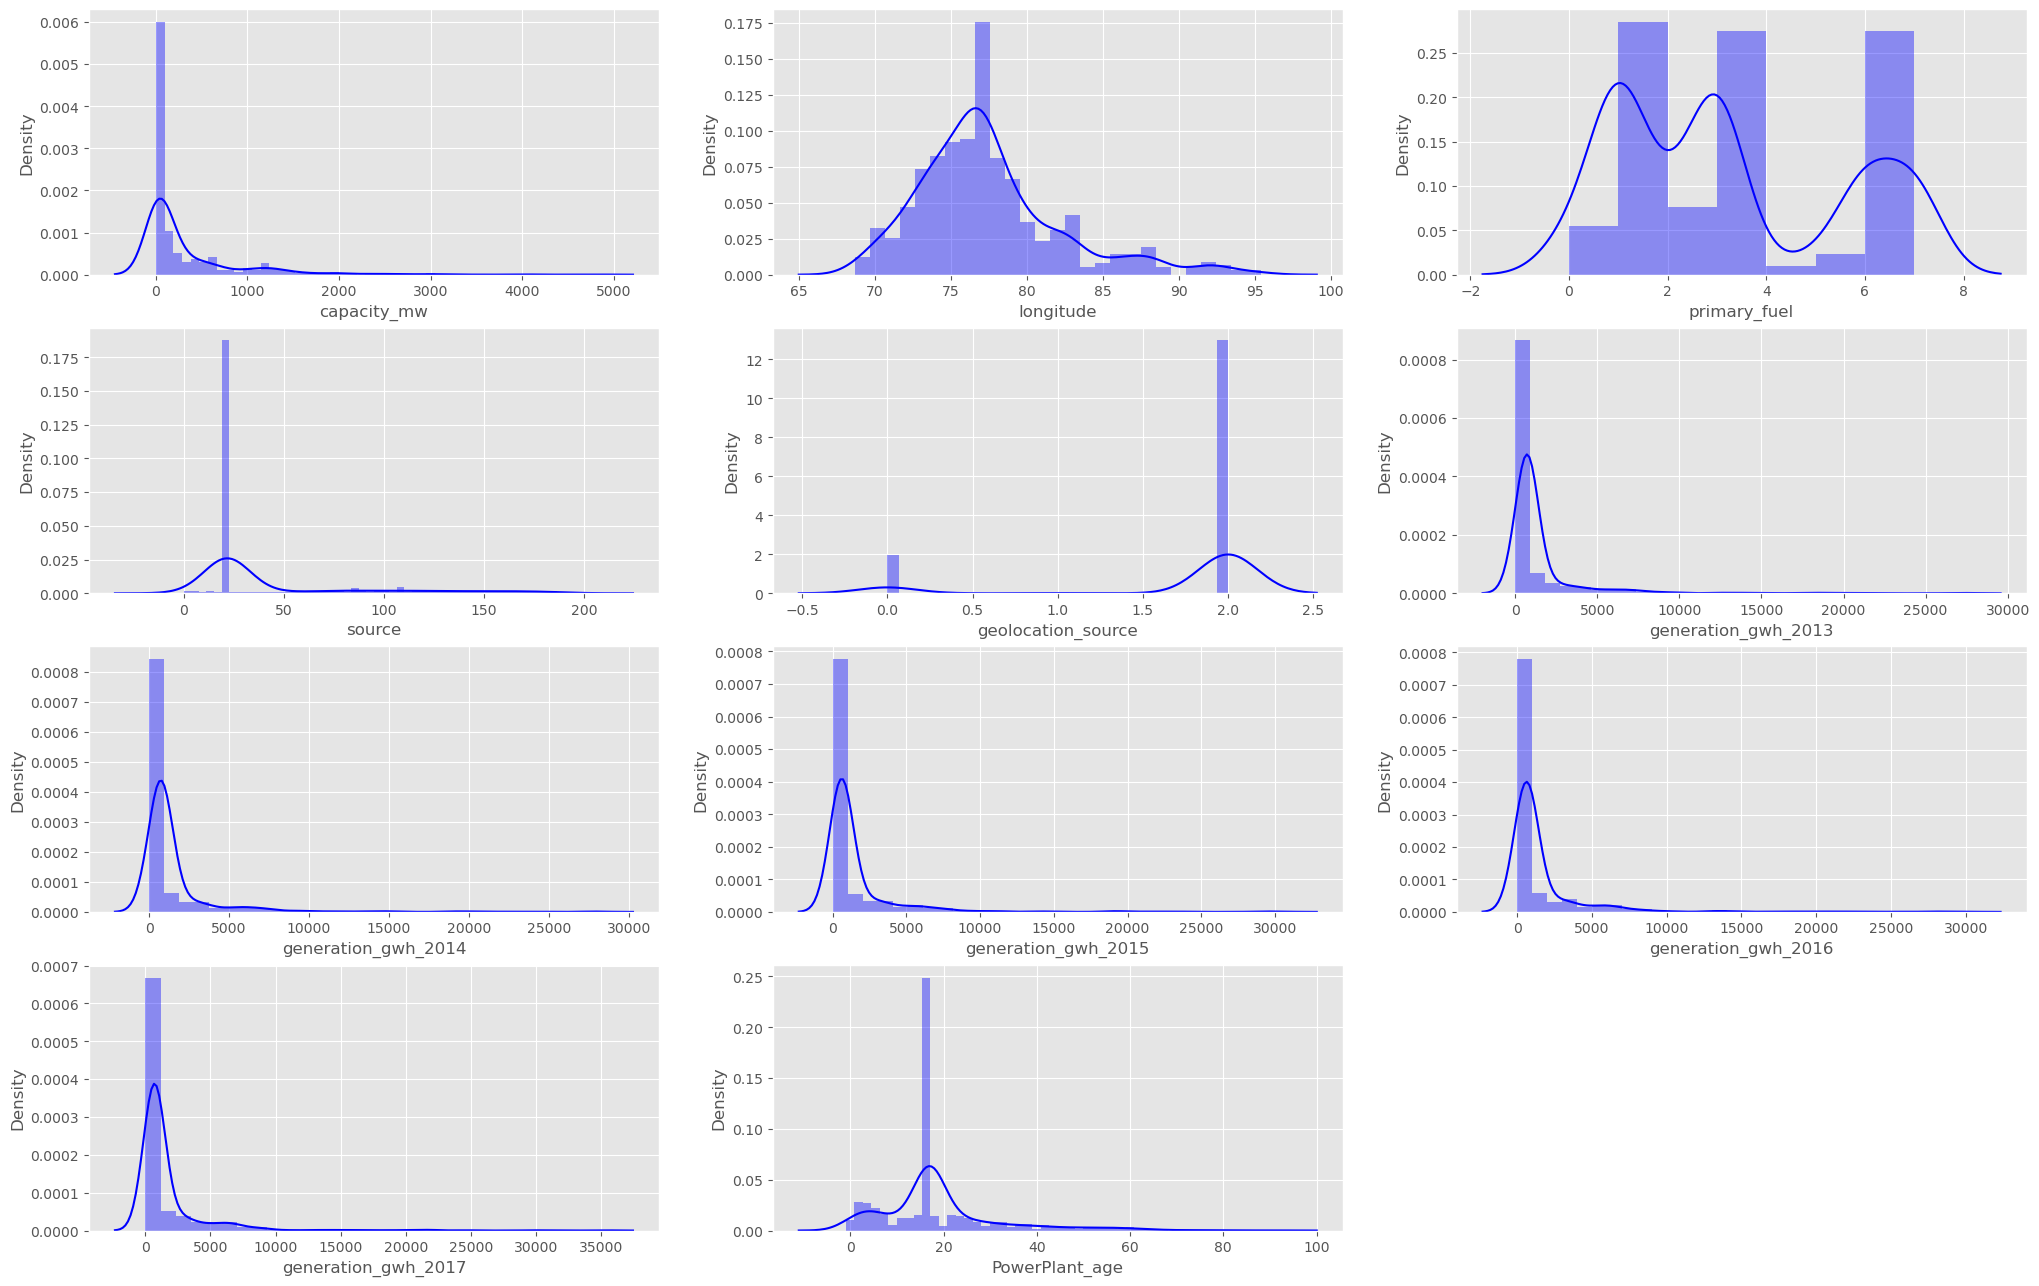

In [391]:
plt.figure(figsize=(25,20))
for i in enumerate(GPD_new.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(GPD[i[1]],color='b')

#### Model Prediction for "Capacity_mw" Target

##### Data Splitting

In [392]:
x = GPD_new.drop(['capacity_mw'],axis=1)
y = GPD_new['capacity_mw']

Scaling X values

In [393]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Model Prediction

In [394]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),BaggingRegressor(),RandomForestRegressor(),
       GradientBoostingRegressor(),Ridge(),Lasso()]
max_r2_score=0
for i_state in range(10,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_score1=r2_score(y_test,pred)
        #print('r2_score for random_state',i_state,'is',r2_score1)
        if r2_score1>max_r2_score:
            max_r2_score=r2_score1
            Final_state=i_state
            Final_model=i
print('R2_score is ',max_r2_score,'for random state ',Final_state, 'and model is ',Final_model)

R2_score is  0.8349070310127004 for random state  15 and model is  GradientBoostingRegressor()


In [395]:
rfc=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_y=rfc.predict(x_test)
rfc=r2_score(y_test,pred_y)
print('r2_score =',rfc*100)

r2_score = 71.07432058980223


RandomForestRegressor has the best r2 score as 76.011 when compared to all Models

#### HYPERPARAMETER TUNING 

RandomizedSearchCV 

In [396]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.33)
random_grid = {'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]}
rfc = RandomForestRegressor()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=11, n_jobs = -1)

rfc_random.fit(x_train, y_train)
best_params = rfc_random.best_params_
best_rfc = RandomForestRegressor(**best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [397]:

best_rfc.fit(x,y)
pred_y1=best_rfc.predict(x_test)
rfc1=r2_score(y_test,pred_y1)
print('Evalating best R2_score for Random Forest Regressor ',rfc1*100)

Evalating best R2_score for Random Forest Regressor  88.18342513995847


In [398]:

print('mean_absolute_error is',mean_absolute_error(y_test,pred_y1))
print('mean_squared_error',mean_squared_error(y_test,pred_y1))
print('root mean absolute error',np.sqrt(mean_absolute_error(y_test,pred_y1)))

mean_absolute_error is 0.2229562525969789
mean_squared_error 0.11485179460757512
root mean absolute error 0.4721824357141834


In [399]:
pred_y1

array([-0.63333505, -0.30495401, -0.68935152, -0.62975559, -0.32651815,
       -0.28872403,  0.86344596, -0.59506397,  0.43829347, -0.97977992,
        0.83799312,  0.07924799, -0.70585001, -1.00597373, -0.60617307,
       -0.43898927, -0.70139911, -0.60473942, -1.74265591,  0.55538509,
       -1.71458317, -0.86761863,  1.28138364, -0.38003459,  1.1249176 ,
        1.05362051,  1.56893098, -1.47119453,  0.07256106, -0.43844611,
       -1.61522923, -0.39302452, -0.24511028, -0.39612171, -0.22823616,
        1.02470332, -0.12953858,  1.0560387 , -0.93779771, -0.01027549,
       -1.16957337,  0.84176851,  1.64655669, -0.64275623, -0.27152665,
        0.06705058,  1.5098408 , -0.70585001,  1.11003665,  0.2889488 ,
       -1.44952582, -0.66586363,  0.69446065,  1.2521391 ,  0.24212667,
       -0.0070962 , -0.16875619,  1.51717176, -0.57430782, -1.17482328,
        0.3916289 ,  1.71295821, -1.03727902,  0.63536605, -0.26377068,
       -0.24948046, -0.6880272 ,  1.08718189,  0.23142543, -0.75

Text(0, 0.5, 'pred_y1')

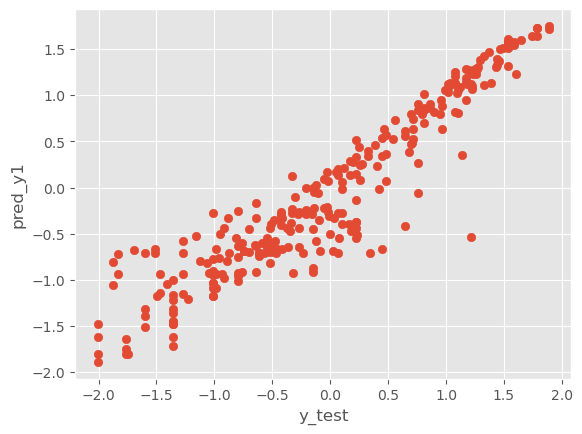

In [400]:
plt.scatter(x=y_test,y=pred_y1)
plt.xlabel('y_test')
plt.ylabel('pred_y1')

Saving the best Model

In [401]:
import pickle
filename = 'GlobalPowerPlant_CapacityPrediction_best_model.pkl'
pickle.dump(best_rfc, open(filename, 'wb'))

In [402]:
import numpy as np
a=np.array(y_test)
predicted=np.array(best_rfc.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,-0.643928,-0.633335
1,-0.006830,-0.304954
2,-0.085039,-0.689352
3,-0.797727,-0.629756
4,-0.643928,-0.326518
...,...,...
277,0.115354,0.216489
278,-1.360607,-1.617452
279,-1.360607,-1.470999
280,-1.597071,-0.705850


#### Model Prediction for "Primary fuel" Target

In [403]:
x2 = GPD_new.drop("primary_fuel", axis=1)
y2 = GPD_new["primary_fuel"]

In [404]:
x2.shape

(852, 10)

In [405]:
y2.shape

(852,)

Scaling data

In [406]:
scaler=StandardScaler()
x2=pd.DataFrame(scaler.fit_transform(x2),columns=x2.columns)
x2

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PowerPlant_age
0,-1.675434,-0.924039,1.529136,-2.242737,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.125769
1,0.214717,-0.500630,1.982857,0.408766,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.075586
2,-0.280583,-2.373612,-0.487830,0.408766,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.075586
3,0.386767,2.492970,-0.421290,0.408766,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.305652
4,1.740344,1.285220,-0.421290,0.408766,0.743909,1.423753,2.285309,2.271019,1.972415,-1.790649
...,...,...,...,...,...,...,...,...,...,...
847,1.680420,0.237064,-0.421290,0.408766,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.016456
848,-1.597071,0.429134,1.159872,-2.452783,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.075586
849,-0.513131,-0.223563,-0.487830,0.408766,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.075586
850,0.105331,-0.762359,0.857313,0.408766,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.075586


In [407]:
y2.value_counts()

primary_fuel
1    240
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: count, dtype: int64

Balacing the data using SMOTE

In [408]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x2, y2 = sm.fit_resample(x2,y2)

In [409]:
y2.value_counts()

primary_fuel
6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: count, dtype: int64

Data Splitting

Model Selection

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [411]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x2,y2,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9401041666666666  on Random_state  42


The accuracy score is 93.8 and it works on the random state 32

Data Splitting

In [414]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=42)

In [415]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.71875
[[56  0  0  0  0  1  0  6]
 [ 6 19  4  3  8  3  0  4]
 [ 3  6 21  5  9  5  0  2]
 [ 0  6  7 31 10  4  0 11]
 [ 0  0  0  0 68  1  0  0]
 [ 6  4  2  0  0 41  0  6]
 [ 1  1  0  0  0  0 58  0]
 [ 0  0  0 11  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        63
           1       0.53      0.40      0.46        47
           2       0.62      0.41      0.49        51
           3       0.62      0.45      0.52        69
           4       0.72      0.99      0.83        69
           5       0.75      0.69      0.72        59
           6       1.00      0.97      0.98        60
           7       0.64      0.82      0.72        62

    accuracy                           0.72       480
   macro avg       0.71      0.70      0.69       480
weighted avg       0.71      0.72      0.70       480

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.8979166666666667
[[61

The model ExtraTreeClassifier works with accuracy score of 91.

#### HYPERPARAMETER TUNING 

RandomizedSearchCV 

In [416]:
parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}



In [417]:

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [424]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [425]:
GCV.best_params_ 

{'criterion': 'gini', 'max_features': 'log2', 'n_jobs': 10}

In [426]:
etc_model = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_jobs = 5)

In [427]:
final_fit = etc_model.fit(x_train,y_train) 
final_pred = etc_model.predict(x_test)
best_accuracy_score = (accuracy_score(y_test, final_pred))*100    
print("The Accuracy Score for the Best Model is ", best_accuracy_score)

The Accuracy Score for the Best Model is  93.125


Saving Best Model

In [428]:
import pickle
filename = 'Global_Power_Plant_Fuel_Type_Classification_final_model.pkl'
pickle.dump(etc_model, open(filename, 'wb'))

In [429]:
import numpy as np
ac=np.array(y_test)
predicted=np.array(etc_model.predict(x_test))
PrimaryFuelData = pd.DataFrame({"original":ac,"predicted":predicted},index= range(len(ac)))
PrimaryFuelData

,original,predicted
0,0,0
1,5,5
2,3,3
3,7,7
4,3,3
...,...,...
475,1,1
476,3,3
477,0,0
478,3,2
